# This is my own experimental code of the pytorch version ddpm

In [2]:
# 挂载google drive
from google.colab import drive
drive.mount('/content/drive')

# 配置环境
# TODO
! pip install denoising_diffusion_pytorch

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import repo code
import os, sys
print(sys.path)
sys.path.append('/content/denoising-diffusion-pytorch')   # 如果仓库在这里

from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer


['/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
# configure our model
import torch
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8),
    flash_attn = True
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000    # number of steps
)

training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()

# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])

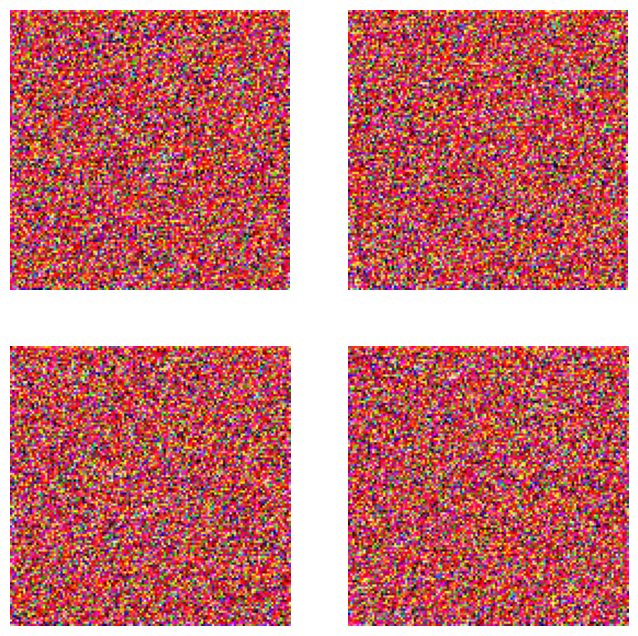

In [ ]:
import matplotlib.pyplot as plt

# sampled_images: (4, 3, 128, 128)

# 将生成图片从 (C, H, W) → (H, W, C)
sampled_images = sampled_images.clamp(0, 1)  # 确保没有越界值

plt.figure(figsize=(8, 8))
for i in range(4):
    img = sampled_images[i].permute(1, 2, 0).detach().cpu().numpy()
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.axis("off")

plt.show()


In [3]:
import os

for root, dirs, files in os.walk('/content'):
    for f in files:
        if f.endswith('.ipynb'):
            print(os.path.join(root, f))


/content/drive/MyDrive/cs231n/assignments/assignment1/collect_submission.ipynb
/content/drive/MyDrive/cs231n/assignments/assignment1/FullyConnectedNets.ipynb
/content/drive/MyDrive/cs231n/assignments/assignment1/knn.ipynb
/content/drive/MyDrive/cs231n/assignments/assignment1/softmax.ipynb
/content/drive/MyDrive/cs231n/assignments/assignment1/features.ipynb
/content/drive/MyDrive/cs231n/assignments/assignment1/two_layer_net.ipynb
/content/drive/Othercomputers/我的笔记本电脑/DDPM_torch_v/denoising-diffusion-pytorch/ddpm_experiment.ipynb
/content/drive/Othercomputers/我的笔记本电脑/cs231n/assignments/assignment1/features.ipynb
/content/drive/Othercomputers/我的笔记本电脑/cs231n/assignments/assignment1/FullyConnectedNets.ipynb
/content/drive/Othercomputers/我的笔记本电脑/cs231n/assignments/assignment1/collect_submission.ipynb
/content/drive/Othercomputers/我的笔记本电脑/cs231n/assignments/assignment1/two_layer_net.ipynb
/content/drive/Othercomputers/我的笔记本电脑/cs231n/assignments/assignment1/softmax.ipynb
/content/drive/Otherco

In [4]:
import json

notebook_path = '/content/drive/Othercomputers/我的笔记本电脑/DDPM_torch_v/denoising-diffusion-pytorch/ddpm_experiment.ipynb'  # 替换成你的文件名

with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = json.load(f)

if 'widgets' in nb.get('metadata', {}):
    print("Removing metadata.widgets ...")
    del nb['metadata']['widgets']

with open(notebook_path, 'w', encoding='utf-8') as f:
    json.dump(nb, f, indent=2)

print("Fixed! Now you can upload to GitHub.")


Removing metadata.widgets ...
Fixed! Now you can upload to GitHub.
